<a href="https://colab.research.google.com/github/ToonToonToon/229352-Statical-Learning-For-DataScience-2/blob/main/Lab05_decision_tree_bagging_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [1]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [2]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [3]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [4]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

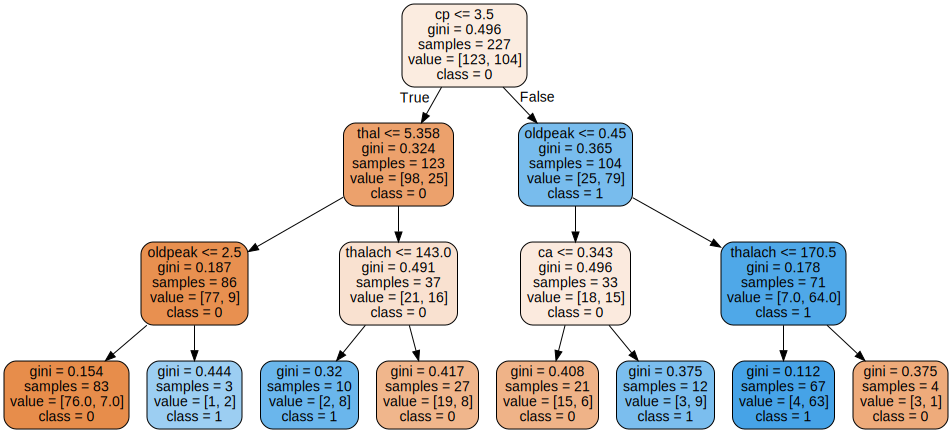

In [5]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [6]:
from sklearn.metrics import classification_report

ypred = gridcv.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78        41
           1       0.73      0.77      0.75        35

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [7]:
clf = DecisionTreeClassifier()

bagged_trees = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0])

bagged_trees.fit(X_train, y_train)

ypred_bt = bagged_trees.predict(X_test)

print(classification_report(y_test, ypred_bt))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80        41
           1       0.76      0.74      0.75        35

    accuracy                           0.78        76
   macro avg       0.78      0.77      0.77        76
weighted avg       0.78      0.78      0.78        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [8]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score

results = {}
best_models = {}

In [10]:
pipeline_dt = Pipeline([
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid_dt = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [3, 5, 7, 10, None],
    'clf__min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='f1_macro', n_jobs=-1)

grid_dt.fit(X_train, y_train)

best_models['Decision Tree'] = grid_dt.best_estimator_
y_pred_dt = grid_dt.predict(X_test)
results['Decision Tree'] = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'F1 Macro': f1_score(y_test, y_pred_dt, average='macro'),
    'Best Params': grid_dt.best_params_
}

print("Best DT Params:", grid_dt.best_params_)

Best DT Params: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 4}


In [11]:
from sklearn.ensemble import BaggingClassifier

pipeline_bg = Pipeline([
    ('clf', BaggingClassifier(estimator=DecisionTreeClassifier(), random_state=42))
])

param_grid_bg = {
    'clf__n_estimators': [10, 50, 100],
    'clf__max_samples': [0.5, 0.7, 1.0],
    'clf__max_features': [0.5, 0.7, 1.0]
}

grid_bg = GridSearchCV(pipeline_bg, param_grid_bg, cv=5, scoring='f1_macro', n_jobs=-1)

grid_bg.fit(X_train, y_train)

best_models['Bagging'] = grid_bg.best_estimator_
y_pred_bg = grid_bg.predict(X_test)
results['Bagging'] = {
    'Accuracy': accuracy_score(y_test, y_pred_bg),
    'F1 Macro': f1_score(y_test, y_pred_bg, average='macro'),
    'Best Params': grid_bg.best_params_
}

print("Best Bagging Params:", grid_bg.best_params_)

Best Bagging Params: {'clf__max_features': 0.7, 'clf__max_samples': 0.5, 'clf__n_estimators': 100}


In [12]:
pipeline_rf = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid_rf = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 5, 10],
    'clf__criterion': ['gini', 'entropy']
}

grid_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)

grid_rf.fit(X_train, y_train)

best_models['Random Forest'] = grid_rf.best_estimator_
y_pred_rf = grid_rf.predict(X_test)
results['Random Forest'] = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'F1 Macro': f1_score(y_test, y_pred_rf, average='macro'),
    'Best Params': grid_rf.best_params_
}

print("Best RF Params:", grid_rf.best_params_)

Best RF Params: {'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__n_estimators': 50}


Model Comparison:
               Accuracy  F1 Macro  \
Decision Tree  0.763158  0.761672   
Bagging        0.789474  0.785765   
Random Forest  0.789474  0.785765   

                                                     Best Params  
Decision Tree  {'clf__criterion': 'gini', 'clf__max_depth': 3...  
Bagging        {'clf__max_features': 0.7, 'clf__max_samples':...  
Random Forest  {'clf__criterion': 'entropy', 'clf__max_depth'...  

Model ที่ดีที่สุดคือ: Bagging


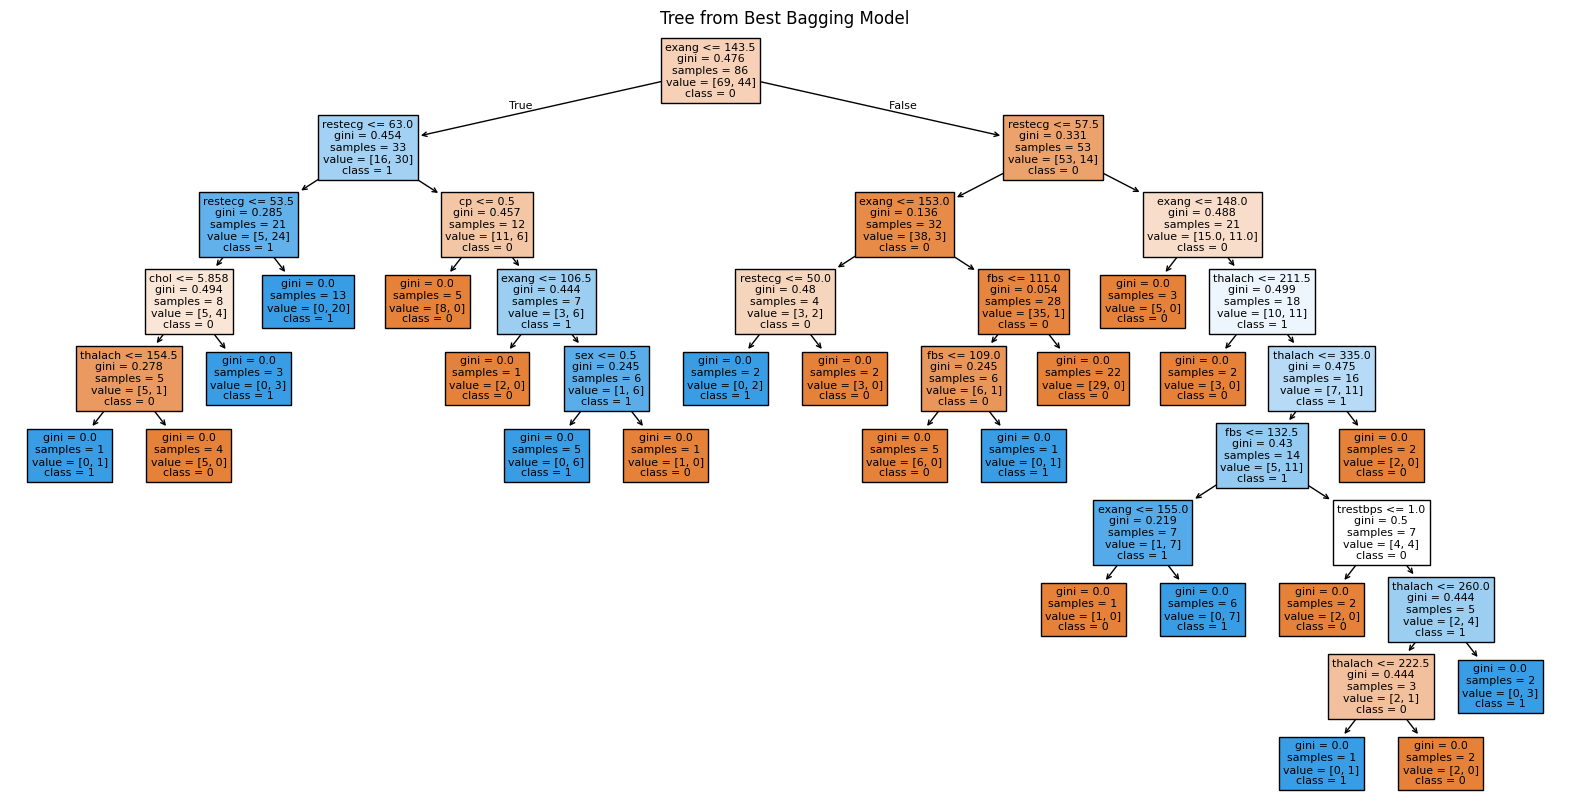

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

df_results = pd.DataFrame(results).T
print("Model Comparison:")
print(df_results)

best_model_name = df_results['F1 Macro'].idxmax()
print(f"\nModel ที่ดีที่สุดคือ: {best_model_name}")

plt.figure(figsize=(20,10))

if best_model_name == 'Decision Tree':
    final_model = best_models['Decision Tree'].named_steps['clf']
    plot_tree(final_model, feature_names=data.columns[:-1], class_names=['0', '1'], filled=True)
    plt.title("Best Decision Tree")

elif best_model_name == 'Random Forest':
    final_model = best_models['Random Forest'].named_steps['clf'].estimators_[0]
    plot_tree(final_model, feature_names=data.columns[:-1], class_names=['0', '1'], filled=True)
    plt.title("Tree from Best Random Forest")

elif best_model_name == 'Bagging':
    final_model = best_models['Bagging'].named_steps['clf'].estimators_[0]
    plot_tree(final_model, feature_names=data.columns[:-1], class_names=['0', '1'], filled=True)
    plt.title("Tree from Best Bagging Model")

plt.show()